# <span style="color:#336699">CAP-351 - Neurocomputação
<hr style="border:1px solid #0077b9;">

Professor:
- Mascos G. Quiles

Discente:
- Camila P. Sales

## Atividade

- Realizar testes com 3(ou mais) datasets selecionados do repositório da UCI (iris, etc...) para várias configuração da rede
- Ilustrar graficamente o processo de aprendizagem pela redução do erro quadrático médio
- Dividir o conjunto em duas partes (Treino e Validação)
- Entregar um relatório descrevendo os experimentos

### Considerar
- Impacto do termo de momentum
<br>
- Impacto da regularização L2

#### Datasets selecionados
 - Detecção de ocupação https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#
 - Padrão de clientes de cartão de crédito https://archive.ics.uci.edu/ml/machine-learning-databases/00350/
 - Avila https://archive.ics.uci.edu/ml/datasets/Avila

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from livelossplot.keras import PlotLossesCallback
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras import regularizers


Using TensorFlow backend.


In [2]:
np.load('../data/dates.npy')

array([datetime.date(2016, 1, 1), datetime.date(2016, 1, 17),
       datetime.date(2016, 2, 2), datetime.date(2016, 2, 18),
       datetime.date(2016, 3, 5), datetime.date(2016, 3, 21),
       datetime.date(2016, 4, 6), datetime.date(2016, 4, 22),
       datetime.date(2016, 5, 8), datetime.date(2016, 5, 24),
       datetime.date(2016, 6, 9), datetime.date(2016, 6, 25),
       datetime.date(2016, 7, 11), datetime.date(2016, 7, 27),
       datetime.date(2016, 8, 12), datetime.date(2016, 8, 28),
       datetime.date(2016, 9, 13), datetime.date(2016, 9, 29),
       datetime.date(2016, 10, 15), datetime.date(2016, 10, 31),
       datetime.date(2016, 11, 16), datetime.date(2016, 12, 2),
       datetime.date(2016, 12, 18), datetime.date(2017, 1, 1),
       datetime.date(2017, 1, 17), datetime.date(2017, 2, 2),
       datetime.date(2017, 2, 18), datetime.date(2017, 3, 6),
       datetime.date(2017, 3, 22), datetime.date(2017, 4, 7),
       datetime.date(2017, 4, 23), datetime.date(2017, 5, 9),

In [3]:
df = pd.read_csv( "../data/balance-scale.data", sep="," , header = None);
df.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [4]:
df.columns = ['class',
'Left-Weight',
'Left-Distance',
'Right-Weight',
'Right-Distance']
df.head()

,class,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [5]:
s = {'L': 0,'B': 1,'R': 2}
df['class'] = df['class'].map(s)
df.to_csv('balance-scale.csv',index=False)

In [6]:
X = df.drop('class',axis=1)
y = df['class'].to_numpy()

# Dividir os dados em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
plot_losses = PlotLossesCallback()

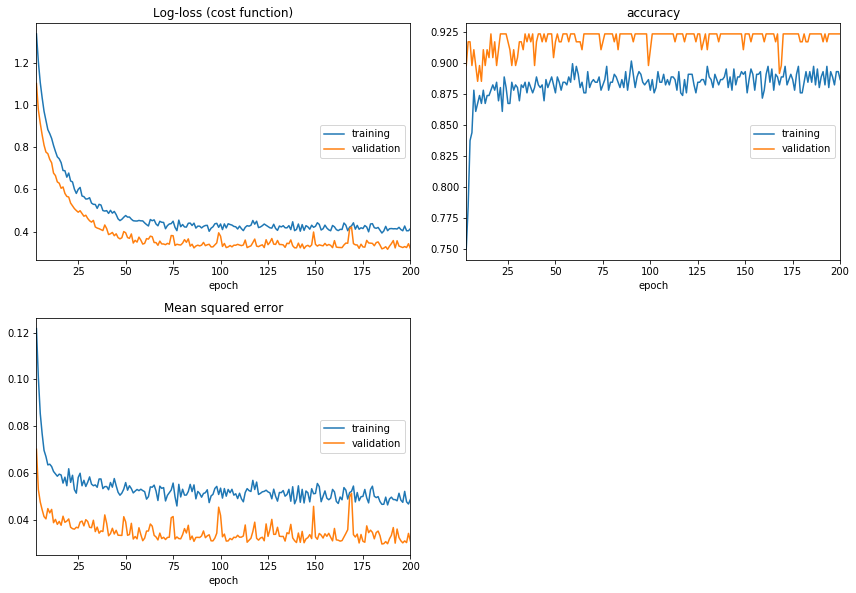

Log-loss (cost function):
training   (min:    0.393, max:    1.869, cur:    0.414)
validation (min:    0.316, max:    1.489, cur:    0.320)

accuracy:
training   (min:    0.487, max:    0.902, cur:    0.887)
validation (min:    0.822, max:    0.924, cur:    0.924)

Mean squared error:
training   (min:    0.046, max:    0.223, cur:    0.049)
validation (min:    0.030, max:    0.147, cur:    0.031)
157/157 [==============================] - 0s 13us/step


In [8]:
model = Sequential()

model.add(Dense(64, input_dim=4, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax',kernel_regularizer=regularizers.l2(0.01)))


sgd = SGD(lr=0.01, decay=1e-6, momentum=0.90, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy','mean_squared_error'
])

history = model.fit(X_train, y_train,
          epochs=200,
          validation_data=(X_test, y_test),
          callbacks=[plot_losses],
          verbose=0)
score = model.evaluate(X_test, y_test, batch_size=128)